# 1. Keyword Extraction

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

df_idf = pd.read_excel('repo.xlsx')
df_idf.head()

,Title,Name,Tahun,Abstract
0,APLIKASI LAYANAN MONITORING PEMESANAN BAJU BER...,"Zuliawati, Erna",2022,Konveksi merupakan sebuah kegiatan usaha yang ...
1,SISTEM REKOMENDASI PENCARIAN TEMPAT WISATA DI ...,"YUSTIAWAN, SEPTIAN ADHI",2022,Kota Kudus memiliki banyak sekali wisata tetap...
2,RANCANG BANGUN SISTEM PENDUKUNG KEPUTUSAN UNTU...,"WIDYAWATI, HENY",2022,Insentif Tahunan merupakan kompensasi pembayar...
3,ESTIMASI PERSEDIAAN OLI PADA TOKO MANDALA DEMA...,"TRIANANDA, NUR FEBRINA",2022,Toko Mandala yang berlokasi di Demak merupakan...
4,PENENTUAN PENGADAAN DAN PENGHAPUSAN INVENTARIS...,"SUSANTA, AGUS",2022,Sistem inventori sudah banyak digunakan atau d...


In [ ]:
df_idf.shape

(261, 4)

## 1.1 Case Folding

In [ ]:
import re
def pre_process(text):

    # lowercase
    text=text.lower()

    #remove tags
    text=re.sub("</?.*?>"," <> ",text)

    # remove special characters and digits
    text=re.sub("(\\d|\\W)+"," ",text)

    return text
#membuat kolom baru bernama text di sebelah kolom abstrak sebagai duplikat dari kolom abstrak untuk diolah supaya kolom abstrak tetap utuh
df_idf['text'] = df_idf['Abstract']
#lambda adalah fungsi anonimus untuk menerapkan fungsi pre prosess pada kolom text meliputi lowercasing, remove tags, remove digits
df_idf['text'] = df_idf['text'].apply(lambda x:pre_process(x))

#show the first 'text'
df_idf['text'][2]

'insentif tahunan merupakan kompensasi pembayaran non pokok yang diberikan perusahaan kepada karyawan sesuai dengan kebijakan perusahaan cv def menghitung perhitungan insentif karyawan tahunan tanpa menggunakan sistem pendukung keputusan untuk menghitung jumlah karyawan yang memakan banyak waktu dalam proses perhitungannya maka dari itu diperlukan sistem pengambilan keputusan guna meminimalkan kesalahan dan mempersingkat waktu penghitungan insentif tahunan perhitungan dapat dilakukan dengan menentukan bobot kriteria yang ditetapkan sesuai dengan kebijakan perusahaan dengan membuat sistem pendukung keputusan memakai metode simple additive weighting saw diharapkan bisa membantu menghitung pendapatan bonus tahunan untuk karyawan kata kunci sistem pendukung keputusan insentif tahunan simple additive weighting process '

## 1.2 Tokenisasi - Stopword Removal - Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import re

with open('stopwords.txt', 'r') as file:
    stopwords = [word.strip() for word in file.readlines()]

#get the text column
docs=df_idf['text'].tolist()

#create a vocabulary of words,
#ignore words that appear in 85% of documents,
#eliminate stop words
cv=CountVectorizer(stop_words=stopwords,
                   ngram_range=(3,3),
                   min_df=0.003,
                   max_features=120
                   )
word_count_vector=cv.fit_transform(docs)
word_count_vector.shape

(261, 120)

Bentuk vektor yang dihasilkan adalah (261, 19905) karena memiliki 261 dokumen dalam kumpulan data (baris) dan ukuran kosakatanya adalah 19905 artinya memiliki 19905 kata unik (kolom) dalam kumpulan data dikurangi stopwords. Untuk membatasi ukuran kosakata dengan menyetting max_features=vocab_size saat membuat instance CountVectorizer.

In [ ]:
list(cv.vocabulary_.keys())[:10]

['simple additive weighting',
 'regresi linier berganda',
 'mean absolute percentage',
 'absolute percentage error',
 'pakar pakar certainty',
 'pakar certainty factor',
 'certainty factor pakar',
 'certainty factor diagnosa',
 'case based reasoning',
 'support analitical hierarchy']

In [ ]:
list(cv.get_feature_names_out())

['absolute percentage error',
 'algoritma camellia kriptografi',
 'algoritma collision detection',
 'algoritma dice similarity',
 'algoritma fisher yates',
 'algoritma minimax pemain',
 'algoritma naïve bayes',
 'analitical hierarchy process',
 'analytical hierarchy process',
 'analytichal hierarchy process',
 'attribute decision making',
 'average hash hamming',
 'bayes classifier naive',
 'black box testing',
 'brown double exponential',
 'browns double exponential',
 'bsm khozinatul ulum',
 'bsm simple additive',
 'bugis dialek tegal',
 'bujur lintang topsis',
 'bulanan fanny futsal',
 'case based reasoning',
 'certainty factor diagnosa',
 'certainty factor pakar',
 'citra abjad citra',
 'citra cropping citra',
 'collaborative filtering heritage',
 'dewasa otomatisasi keefektifan',
 'double exponential smoothing',
 'exponential smoothing holt',
 'exponential smoothing mad',
 'exponential smoothing memprediksi',
 'frequency identification rfid',
 'function point fp',
 'fuzzy multiple

## 1.3 TF-IDF

In [ ]:
#mengimport Tfidftransformer dari modul feature_extraction.text dari library sklrean
from sklearn.feature_extraction.text import TfidfTransformer

#smooth_idf menghindari pembagian dengan 0
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
#menerapkan tfidf transformer kedalam WCV
tfidf_transformer.fit(word_count_vector)

TfidfTransformer()

In [ ]:
#menampilkan vektor
tfidf_transformer.idf_

array([5.18205014, 5.87519732, 5.87519732, 5.46973222, 5.87519732,
       5.87519732, 5.18205014, 5.87519732, 4.48890296, 5.87519732,
       5.46973222, 5.87519732, 5.87519732, 4.77658503, 5.87519732,
       5.87519732, 5.87519732, 5.87519732, 5.87519732, 5.46973222,
       5.87519732, 5.18205014, 4.95890659, 5.18205014, 5.87519732,
       5.87519732, 5.87519732, 5.46973222, 4.00339515, 4.77658503,
       4.95890659, 5.18205014, 5.87519732, 5.87519732, 5.87519732,
       5.87519732, 5.87519732, 5.87519732, 5.87519732, 5.46973222,
       5.46973222, 5.46973222, 5.87519732, 5.87519732, 5.87519732,
       5.46973222, 5.87519732, 5.87519732, 4.26575941, 5.87519732,
       5.87519732, 5.87519732, 5.87519732, 5.46973222, 5.46973222,
       5.87519732, 5.46973222, 5.87519732, 5.87519732, 5.87519732,
       5.87519732, 5.87519732, 5.87519732, 5.87519732, 5.18205014,
       5.18205014, 5.46973222, 5.18205014, 5.46973222, 5.87519732,
       5.46973222, 5.46973222, 5.18205014, 5.46973222, 5.87519

## 1.4 Mengekstrak Keyword

Data diatas adalah data training yang sudah diolah lalu aplikasikan ke data testing dengan read ulang repo - preprrocess - convert list

In [ ]:
# read test docs into a dataframe and concatenate product and desc
df_test=pd.read_excel('repo.xlsx')
df_test['text'] = df_test['Title'] + df_test['Abstract']
df_test['text'] = df_test['text'].apply(lambda x:pre_process(x))

# get test docs into a list
docs_test=df_test['Abstract'].tolist()

In [ ]:
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)

def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""

    #use only topn items from vector
    sorted_items = sorted_items[:topn]

    score_vals = []
    feature_vals = []

    for idx, score in sorted_items:
        fname = feature_names[idx]

        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])

    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]

    return results

In [ ]:
# you only needs to do this once
feature_names=cv.get_feature_names_out()

# get the document that we want to extract keywords from
doc=docs_test[0]

#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())

#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,10)

## 1.5 Mengambil keyword hasil ekstraksi

In [ ]:
#generate tf-idf for all documents in your list. docs_test has 500 documents
tf_idf_vector=tfidf_transformer.transform(cv.transform(docs_test))

results=[]
for i in range(tf_idf_vector.shape[0]):

    # get vector for a single document
    curr_vector=tf_idf_vector[i]

    #sort the tf-idf vector by descending order of scores
    sorted_items=sort_coo(curr_vector.tocoo())

    #extract only the top n; n here is 10
    keywords=extract_topn_from_vector(feature_names,sorted_items,10)


    results.append(keywords)

keyword_ext=pd.DataFrame(zip(docs,results),columns=['doc','keywords'])
keyword_ext

,doc,keywords
0,konveksi merupakan sebuah kegiatan usaha yang ...,{}
1,kota kudus memiliki banyak sekali wisata tetap...,{}
2,insentif tahunan merupakan kompensasi pembayar...,{'simple additive weighting': 1.0}
3,toko mandala yang berlokasi di demak merupakan...,"{'regresi linier berganda': 0.923, 'mean absol..."
4,sistem inventori sudah banyak digunakan atau d...,{}
...,...,...
256,klinik merupakan salah satu instansi yang berg...,{}
257,penjualan mukena pakaian ditoko merupakan sala...,"{'griya safira ungaran': 0.894, 'safira ungara..."
258,jalan raya merupakan sarana infrastruktur pent...,{'simple additive weighting': 1.0}
259,pemantauan kemajuan pelaksanaan pemasangan jar...,{}


In [ ]:
keyword_ext.keywords = keyword_ext.keywords.astype(str)

# 2. Rangkaian Proses Visualisasi

In [ ]:
keyword_ext.keywords = keyword_ext.keywords.replace({r"[:.{}']":""}, regex=True)
keyword_ext.head()

,doc,keywords
0,konveksi merupakan sebuah kegiatan usaha yang ...,
1,kota kudus memiliki banyak sekali wisata tetap...,
2,insentif tahunan merupakan kompensasi pembayar...,simple additive weighting 10
3,toko mandala yang berlokasi di demak merupakan...,"regresi linier berganda 0923, mean absolute pe..."
4,sistem inventori sudah banyak digunakan atau d...,


In [ ]:
keyword_ext.keywords = keyword_ext.keywords.replace({r"[:.{}']":""}, regex=True)
keyword_ext.head()

,doc,keywords
0,konveksi merupakan sebuah kegiatan usaha yang ...,
1,kota kudus memiliki banyak sekali wisata tetap...,
2,insentif tahunan merupakan kompensasi pembayar...,simple additive weighting 10
3,toko mandala yang berlokasi di demak merupakan...,"regresi linier berganda 0923, mean absolute pe..."
4,sistem inventori sudah banyak digunakan atau d...,


In [ ]:
keyword_ext.keywords = keyword_ext.keywords.str.replace('\d', '', regex=True)
keyword_ext.head()

,doc,keywords
0,konveksi merupakan sebuah kegiatan usaha yang ...,
1,kota kudus memiliki banyak sekali wisata tetap...,
2,insentif tahunan merupakan kompensasi pembayar...,simple additive weighting
3,toko mandala yang berlokasi di demak merupakan...,"regresi linier berganda , mean absolute percen..."
4,sistem inventori sudah banyak digunakan atau d...,


In [ ]:
keyword_ext = keyword_ext[keyword_ext.keywords.str.len() != 0]

## 2.1 Time Series

In [ ]:
keyword_ext = keyword_ext.merge(df_idf['Tahun'], left_index=True, right_index=True, how='inner')
keyword_ext

,doc,keywords,Tahun
2,insentif tahunan merupakan kompensasi pembayar...,simple additive weighting,2022
3,toko mandala yang berlokasi di demak merupakan...,"regresi linier berganda , mean absolute percen...",2022
6,negara indonesia khususnya di daerah jawa teng...,"pakar pakar certainty , pakar certainty factor...",2022
7,program pendidikan sarjana di indonesia yang t...,case based reasoning,2022
10,pt ungaran sari garments merupakan perusahaan ...,"support analitical hierarchy , analitical hier...",2022
...,...,...,...
254,belum adanya sistem pendukung keputusan yang m...,logika fuzzy mamdani,2018
255,sistem internet of things iot memungkinkan pen...,internet of things,2018
257,penjualan mukena pakaian ditoko merupakan sala...,"griya safira ungaran , safira ungaran griya",2018
258,jalan raya merupakan sarana infrastruktur pent...,simple additive weighting,2018


In [ ]:
dft = pd.DataFrame(keyword_ext['keywords'].str.split(",",expand=True).stack().reset_index())
dft = dft.merge(df_idf['Tahun'], left_on='level_0', right_index=True)
dft = dft.drop(['level_0', 'level_1'], axis=1)
dft.head()

,0,Tahun
0,simple additive weighting,2022
1,regresi linier berganda,2022
2,mean absolute percentage,2022
3,absolute percentage error,2022
4,pakar pakar certainty,2022


In [ ]:
dft = dft.set_axis(['keywords', 'tahun'], axis=1, inplace=False)
dft = dft[dft['keywords'].str.len() != 0]
dft['keywords'] = dft['keywords'].str.strip()
dft.head()

,keywords,tahun
0,simple additive weighting,2022
1,regresi linier berganda,2022
2,mean absolute percentage,2022
3,absolute percentage error,2022
4,pakar pakar certainty,2022


In [ ]:
dft.to_excel('year.xlsx', index=False)

## 2.2 Visualisasi

In [ ]:
import matplotlib.pyplot as plt

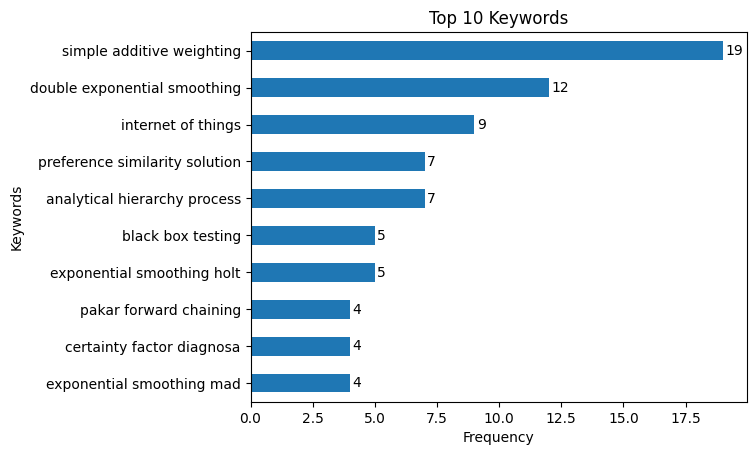

In [ ]:
top_10 = dft['keywords'].value_counts()[:10]
top_10 = top_10.sort_values()
top_10.plot(kind='barh')
plt.xlabel('Frequency')
plt.ylabel('Keywords')
plt.title('Top 10 Keywords')
for i, v in enumerate(top_10):
  plt.annotate(str(v), xy=(v+0.1, i), ha='left', va='center')
plt.show()

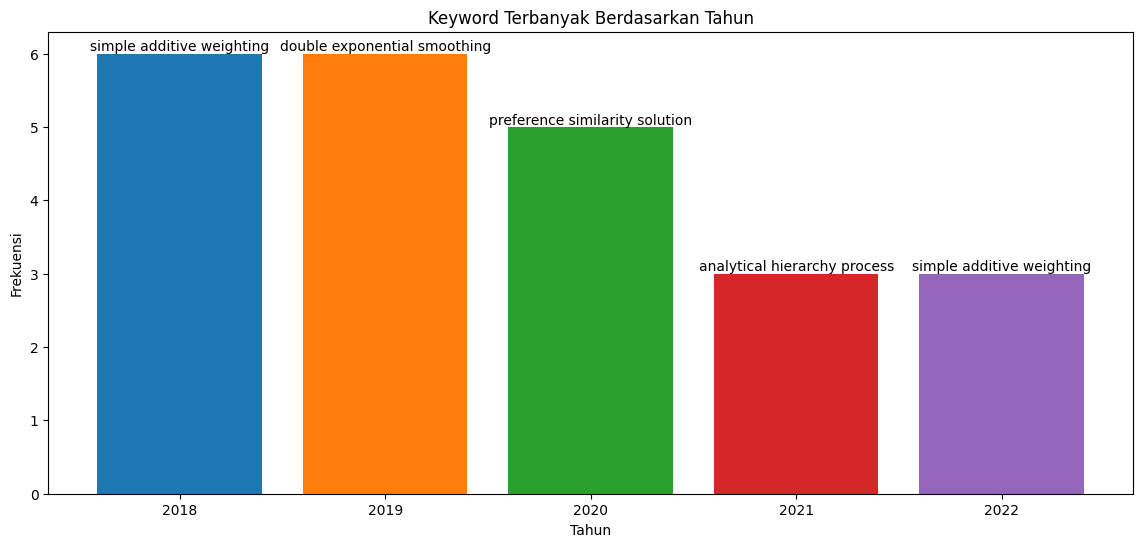

In [ ]:
keyword_counts = dft.groupby('tahun')['keywords'].value_counts()
top_keywords = keyword_counts.groupby('tahun').idxmax().apply(lambda x: x[1])

# Visualisasi data dengan bar chart
plt.figure(figsize=(14,6))
x = range(len(top_keywords))
for i, tahun in enumerate(top_keywords.index):
    keyword = top_keywords[tahun]
    plt.bar(i, keyword_counts.loc[tahun, keyword], label=tahun)
    plt.text(i, keyword_counts.loc[tahun, keyword], keyword, ha='center', va='bottom')
plt.xticks(x, top_keywords.index)
plt.xlabel('Tahun')
plt.ylabel('Frekuensi')
plt.title('Keyword Terbanyak Berdasarkan Tahun')
plt.show()

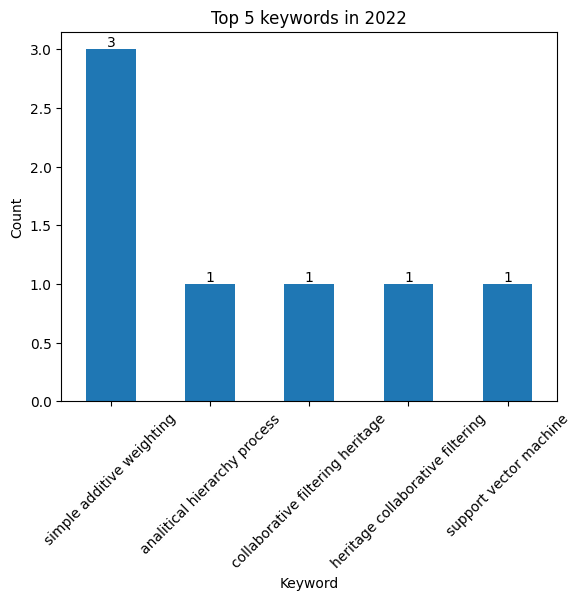

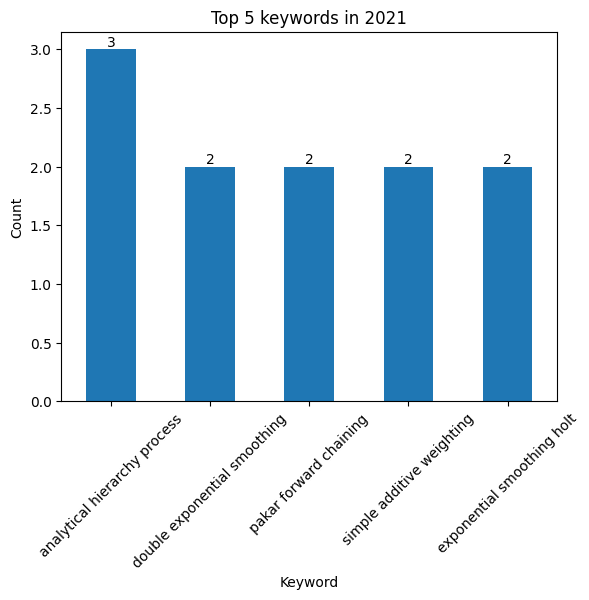

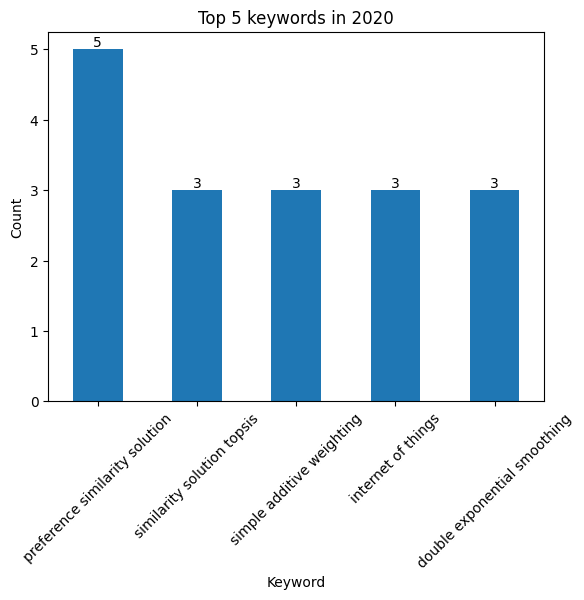

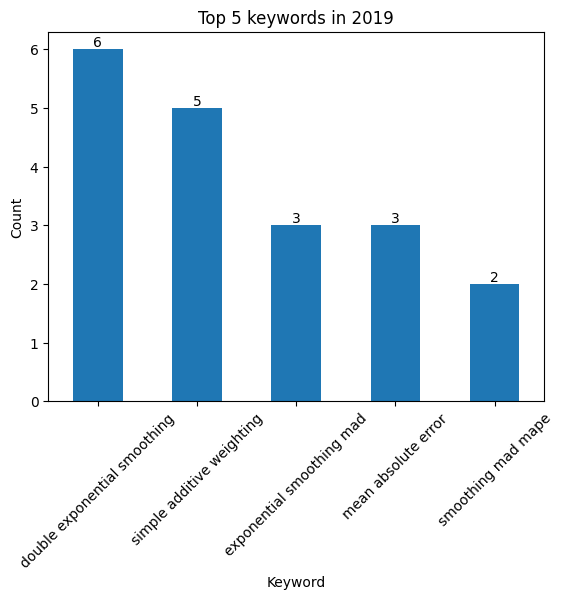

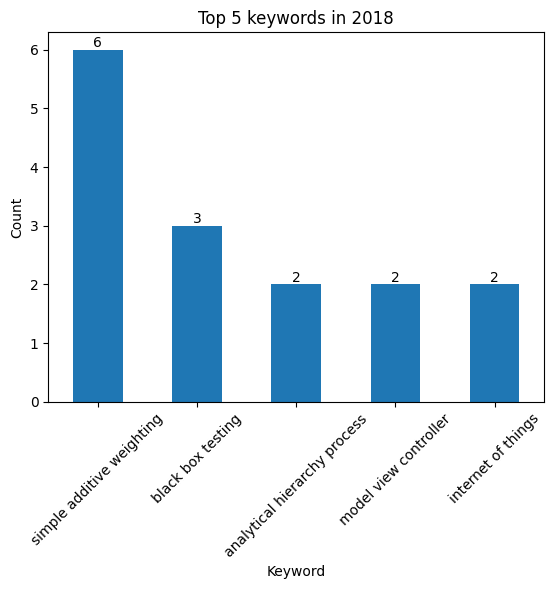

In [ ]:
for year in dft['tahun'].unique():
    result = dft[dft['tahun'] == year]['keywords'].value_counts()[:5]
    result.plot(kind='bar')
    plt.title(f"Top 5 keywords in {year}")
    plt.xlabel("Keyword")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    for i, v in enumerate(result):
      plt.annotate(str(v), xy=(i, v), ha='center', va='bottom')
    plt.show()

# Rangkaian Proses Validasi

## 3.1 Mengambil Keyword asli

In [ ]:
#menduplikat kolom abstract dan membuat kolom baru bernama kata kunci
keyword_asli = df_idf['text'].str.split('kata kunci', expand=True)
keyword_asli.rename({1:'kata_kunci'}, axis=1, inplace=True)

In [ ]:
#mengubah semua kata kunci menjadi huruf kecil
#memilih hanya kolom kata kunci. mengganti karakter " dengan spasi
keyword_asli = keyword_asli[['kata_kunci']]
keyword_asli

,kata_kunci
0,sistem monitoring pemesanan waterfall website
1,haversine kota kudus rekomendasi tempat wisata
2,sistem pendukung keputusan insentif tahunan s...
3,sistem estimasi persediaan oli regresi linier...
4,laporan tugas akhir sistem inventori fuzzy ma...
...,...
256,sistem informasi klinik pendaftaran antrian
257,sistem informasi penjualan griya safira ungaran
258,jalan raya simple additive weighting saw sist...
259,sistem monitoring pasang baru perubahan daya pln


In [ ]:
keyword_asli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   kata_kunci  250 non-null    object
dtypes: object(1)
memory usage: 2.2+ KB


In [ ]:
matching = pd.merge(keyword_asli[keyword_asli['kata_kunci'].notna()], keyword_ext['keywords'], left_index=True, right_index=True)

In [ ]:
matching

,kata_kunci,keywords
2,sistem pendukung keputusan insentif tahunan s...,simple additive weighting
3,sistem estimasi persediaan oli regresi linier...,"regresi linier berganda , mean absolute percen..."
6,sistem pakar certainty factor bawang merah di...,"pakar pakar certainty , pakar certainty factor..."
7,prediksi masa studi case based reasoning cosi...,case based reasoning
10,sistem pendukung keputusan penilaian karyawan...,"support analitical hierarchy , analitical hier..."
...,...,...
254,logika fuzzy metode mamdani fuzzy mamdani per...,logika fuzzy mamdani
255,internet of things penyiraman real time mqtt ...,internet of things
257,sistem informasi penjualan griya safira ungaran,"griya safira ungaran , safira ungaran griya"
258,jalan raya simple additive weighting saw sist...,simple additive weighting


## 3.2 Validasi - Cosine Similarity

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from numpy.linalg import norm

# Combine all to make single corpus of text (i.e. list of sentences)
corpus = pd.concat([matching['kata_kunci'], matching['keywords']], axis=0, ignore_index=True).to_list()
# print(corpus)  # Display list of sentences

# Vectorization using basic Bag of Words (BoW) approach
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
# print(vectorizer.get_feature_names_out())  # Display features
vect_sents = X.toarray()

cosine_sim_scores = []
# Iterate over each vectorised sentence in the A-B pairs from the original dataframe
for A_vect, B_vect in zip(vect_sents, vect_sents[int(len(vect_sents)/2):]):
    # Calculate cosine similarity and store result
    cosine_sim_scores.append(np.dot(A_vect, B_vect)/(norm(A_vect)*norm(B_vect)))
# Append results to original dataframe
matching.insert(2, 'cosine_sim', cosine_sim_scores)
matching

,kata_kunci,keywords,cosine_sim
2,sistem pendukung keputusan insentif tahunan s...,simple additive weighting,0.577350
3,sistem estimasi persediaan oli regresi linier...,"regresi linier berganda , mean absolute percen...",0.294174
6,sistem pakar certainty factor bawang merah di...,"pakar pakar certainty , pakar certainty factor...",0.585540
7,prediksi masa studi case based reasoning cosi...,case based reasoning,0.612372
10,sistem pendukung keputusan penilaian karyawan...,"support analitical hierarchy , analitical hier...",0.447214
...,...,...,...
254,logika fuzzy metode mamdani fuzzy mamdani per...,logika fuzzy mamdani,0.800641
255,internet of things penyiraman real time mqtt ...,internet of things,0.577350
257,sistem informasi penjualan griya safira ungaran,"griya safira ungaran , safira ungaran griya",0.707107
258,jalan raya simple additive weighting saw sist...,simple additive weighting,0.547723


In [ ]:
matching.describe().T

,count,mean,std,min,25%,50%,75%,max
cosine_sim,135.0,0.437248,0.256187,0.0,0.271473,0.516398,0.612372,0.866025


# Word Cloud

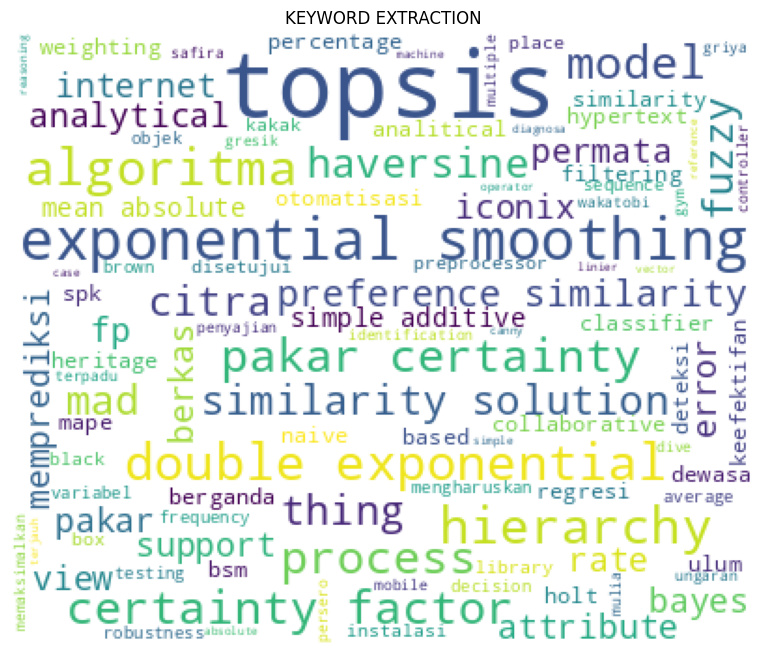

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_cloud = WordCloud(
                          width=400,
                          height=330,
                          background_color='white',
                          max_words=100,
                          max_font_size=50,
                          random_state=42,
                          colormap='viridis_r'
                         ).generate(str(keyword_ext['keywords'].str.split(',',expand=True).stack().unique()))

fig = plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.title('KEYWORD EXTRACTION')
plt.show()
#fig.savefig("ori.png", dpi=1000)

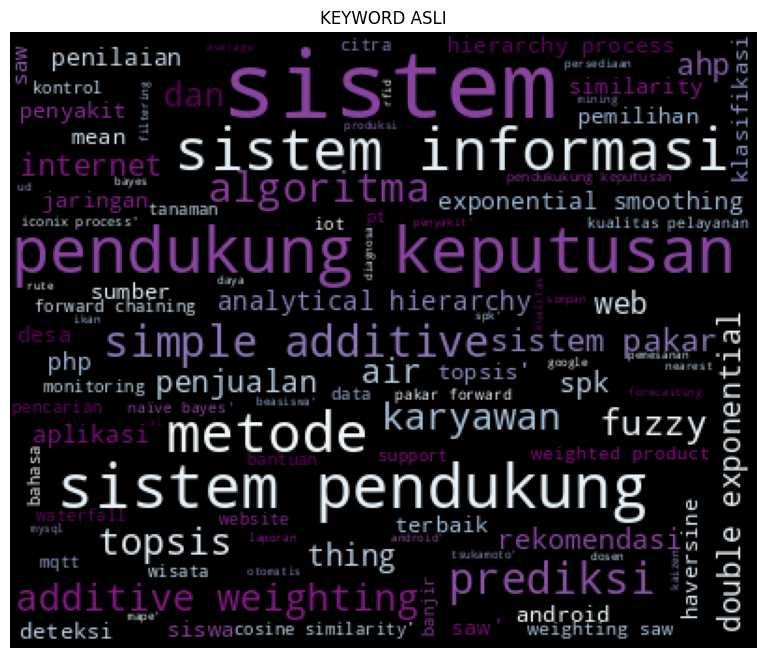

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_cloud = WordCloud(
                          width=400,
                          height=330,
                          background_color='black',
                          max_words=100,
                          max_font_size=50,
                          random_state=42,
                          colormap='BuPu'
                         ).generate(str(keyword_asli['kata_kunci'].str.split(',',expand=True).stack().unique()))

fig = plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.title('KEYWORD ASLI')
plt.show()
#fig.savefig("ori.png", dpi=1000)